In [42]:
from config import api_key
import requests
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [43]:
def get_json(url):
    response = requests.get(url)
    return response.json(
    )

In [44]:
def variable_list(v):
    url_fields = ''
    for i in v:
        url_fields = url_fields + i + ','
    return url_fields[:len(url_fields)-1]

In [45]:
variables = ['OWNCHAR','OWNCHAR_LABEL','OWNER_RACE','OWNER_RACE_LABEL','OWNPDEMP','OWNPDEMP_F']

In [46]:
url = f'https://api.census.gov/data/2018/abscbo?get={variable_list(variables)}&for=us:*&key={api_key}'

In [47]:
response = requests.get(url)
response.text
file = response.json()

In [48]:
file_df = pd.DataFrame(file)
file_df.columns = file_df.loc[0]
# make the first row equivalent to the headers
file_df.drop(0,inplace=True)
# drop the first row
file_df['OWNPDEMP'] = file_df['OWNPDEMP'].astype(int)
# turn number of employees into an integer
file_df.replace('Before 1980','1980 & Earlier',inplace=True)
# replace Before 1980 with 1980 and Earlier so it will sort nicely by year
file_df = file_df[(file_df['OWNCHAR_LABEL'] != "Don't know") & (file_df['OWNCHAR_LABEL'] != 'Item not reported')]
# drop values for business age that aren't year ranges (except total reporting)
file_df_race_all = file_df[(file_df['OWNER_RACE_LABEL'] != 'All owners of respondent firms') & (file_df['OWNER_RACE_LABEL'] != 'Minority') & (file_df['OWNER_RACE_LABEL'] != 'Nonminority') & (file_df['OWNCHAR'] == 'CO')]
# dataframe for total races of business owners
file_df = file_df[file_df['OWNCHAR_LABEL'] != 'Total reporting']
# dropping the values for total reporting for business age
all_data_aggr = file_df[file_df['OWNER_RACE'] == '00']
# creating a data frame with all of the data aggregated by year, to ensure the correct number of responses is summed


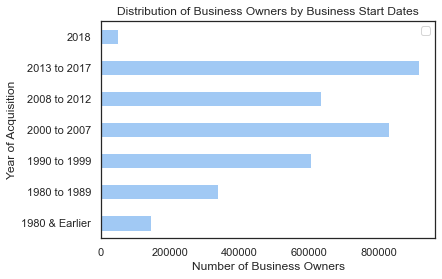

In [49]:
#VISUALIZATION 1
sns.set_theme(style="white", palette='pastel')

business_ages = all_data_aggr.plot.barh(title="Distribution of Business Owners by Business Start Dates",x='OWNCHAR_LABEL',y='OWNPDEMP')
# bar chart showing distribution of business ages
business_ages.set_ylabel('Year of Acquisition')
# distribution of business ages
business_ages.set_xlabel('Number of Business Owners')
business_ages.legend('')

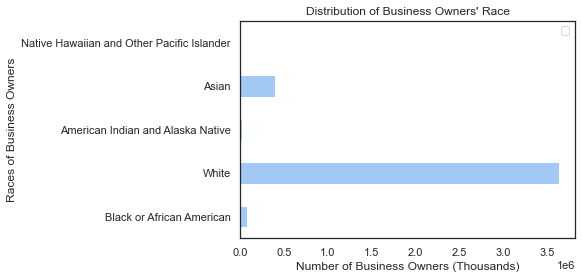

In [50]:
# VISUALIZATION 2: DISTRIBUTION OF BUSINESS OWNERS RACE
business_races = file_df_race_all.plot.barh(title="Distribution of Business Owners' Race",x='OWNER_RACE_LABEL',y="OWNPDEMP")
business_races.set_ylabel('Races of Business Owners')
business_races.set_xlabel('Number of Business Owners (Thousands)')
business_races.legend('')
# doesn't work with the all_data_aggr df

In [51]:
# VIS 3 CLUSTERED COLUMN BY MINORITY/NONMINORITY
nonminority = file_df[file_df['OWNER_RACE_LABEL'] == 'Nonminority'].copy()
minority = file_df[file_df['OWNER_RACE_LABEL'] == 'Minority'].copy()

nonminority.drop(columns = ['OWNER_RACE','OWNER_RACE_LABEL','OWNPDEMP_F','us','OWNCHAR'],inplace=True)
minority.drop(columns = ['OWNER_RACE','OWNER_RACE_LABEL','OWNPDEMP_F','us','OWNCHAR'],inplace=True)
nonminority.rename(columns = {'OWNPDEMP' : 'Nonminority'},inplace=True)
minority.rename(columns = {'OWNPDEMP':'Minority'},inplace=True)


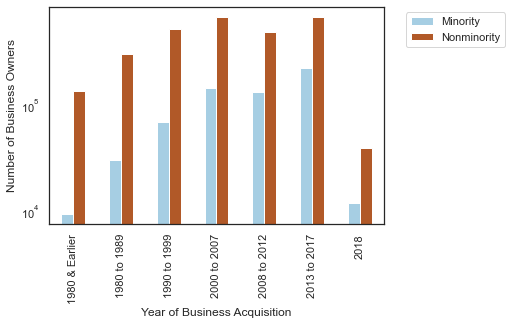

In [52]:
# VIS 3: CLUSTERED COLUMN MINORITY AND NONMINORITY BUSINESS OWNERS
min_nonmin = pd.merge(minority,nonminority,on='OWNCHAR_LABEL')
min_nonmin = min_nonmin.sort_values('OWNCHAR_LABEL')
min_nonmin_chart = min_nonmin.plot.bar(x='OWNCHAR_LABEL', logy=True,colormap='Paired')
min_nonmin_chart.set_xlabel("Year of Business Acquisition")
min_nonmin_chart.set_ylabel("Number of Business Owners")
min_nonmin_chart.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [53]:
# VIS 4
pacific = file_df[file_df['OWNER_RACE_LABEL'] == 'Native Hawaiian and Other Pacific Islander'].copy()
pacific.drop(columns = ['OWNER_RACE','OWNER_RACE_LABEL','OWNPDEMP_F','us','OWNCHAR'],inplace=True)
pacific.rename(columns = {'OWNPDEMP' : 'Native Hawaiian and Other Pacific Islander'},inplace=True)

asian = file_df[file_df['OWNER_RACE_LABEL'] == 'Asian'].copy()
asian.drop(columns = ['OWNER_RACE','OWNER_RACE_LABEL','OWNPDEMP_F','us','OWNCHAR'],inplace=True)
asian.rename(columns = {'OWNPDEMP' : 'Asian'},inplace=True)

p_a = pd.merge(pacific,asian,on='OWNCHAR_LABEL')

amer_indian = file_df[file_df['OWNER_RACE_LABEL'] == 'American Indian and Alaska Native'].copy()
amer_indian.drop(columns = ['OWNER_RACE','OWNER_RACE_LABEL','OWNPDEMP_F','us','OWNCHAR'],inplace=True)
amer_indian.rename(columns = {'OWNPDEMP' : 'American Indian and Alaska Native'},inplace=True)

p_a_ai = pd.merge(p_a,amer_indian,on='OWNCHAR_LABEL')

white = file_df[file_df['OWNER_RACE_LABEL'] == 'White'].copy()
white.drop(columns = ['OWNER_RACE','OWNER_RACE_LABEL','OWNPDEMP_F','us','OWNCHAR'],inplace=True)
white.rename(columns = {'OWNPDEMP' : 'White'},inplace=True)

p_a_ai_w = pd.merge(p_a_ai,white,on='OWNCHAR_LABEL')

black = file_df[file_df['OWNER_RACE_LABEL'] == 'Black or African American'].copy()
black.drop(columns = ['OWNER_RACE','OWNER_RACE_LABEL','OWNPDEMP_F','us','OWNCHAR'],inplace=True)
black.rename(columns = {'OWNPDEMP' : 'Black or African American'},inplace=True)

all_owner_races_by_year = pd.merge(p_a_ai_w,black,on="OWNCHAR_LABEL")

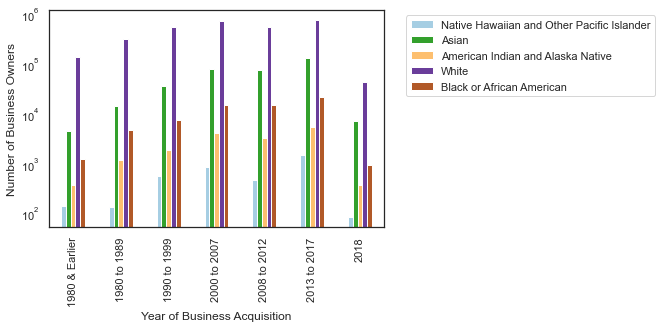

In [54]:
all_owner_races_by_year = all_owner_races_by_year.sort_values('OWNCHAR_LABEL')
all_races_chart = all_owner_races_by_year.plot.bar(x='OWNCHAR_LABEL', logy=True,colormap='Paired')
all_races_chart.set_xlabel("Year of Business Acquisition")
all_races_chart.set_ylabel("Number of Business Owners")
all_races_chart.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()